![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Detection in an Image

## Domain
Mobile Phones, Computer Vision

## Business Context
The ability to process visual information using machine learning algorithms can be very useful. Electronics companies can use it to identify the presence of a mobile in an image (location), mobile brand just by looking at the image, and minor damages if there are any. The computer vision field has multiple applications and based on the available data it can be used to meet business objectives.
Here, we will use a simple convolutional neural network to classify images with and without mobile phones. 
 
## Objective

Given the images and label whether an image has a mobile phone or not, can you train a model that allows you to map and find the presence of mobile phones within the selected images.


### Package version
- tensorflow==2.3.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Data loading and Data Analysis 

4. Visualize and Standardize the data

5. Model Building

6. Evaluate Model

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [3]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow as tf
print(tf.__version__)


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath
from tensorflow.keras.layers import BatchNormalization
import cv2

2.4.1


## 2. Setting Options

In [4]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Data loading and Data Analysis 

### Read images and save the pixel information to an array. Also, save their corresponding label to a list ( YES-Mobile - 1, NO-Mobile - 0). Resize the images to shape (128, 128, 3).

In [5]:
os.chdir("/content/drive/MyDrive/Dataset/file")
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Dataset/file/mobile-images-20210309T085357Z-001.zip', 'r') as z:
  z.extractall()

In [6]:
Yes_mobile = "/content/drive/MyDrive/Dataset/file/mobile-images/yes-mobile"
no_mobile = "/content/drive/MyDrive/Dataset/file/mobile-images/no-mobile"

print("length of Yes_mobile images->",len(os.listdir(Yes_mobile)))
print("length of No_mobile images->",len(os.listdir(no_mobile)))

length of Yes_mobile images-> 124
length of No_mobile images-> 121


(90, 90, 3)


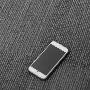

In [7]:
from google.colab.patches import cv2_imshow
yes_mobile = os.listdir(Yes_mobile)
img = cv2.imread(Yes_mobile + "/" + yes_mobile[0] )
print(img.shape)
cv2_imshow(img)

In [8]:
yes = os.listdir(Yes_mobile)

x_yes = []
y_yes = []

for i in yes :
  img = cv2.imread(os.path.join(Yes_mobile,i))
  img = cv2.resize(img,(128,128))
  x_yes.append(img)
  y_yes.append(1)


In [9]:
no = os.listdir(no_mobile)

x_no = []
y_no = []

for i in no :
  img = cv2.imread(os.path.join(no_mobile,i))
  img = cv2.resize(img,(128,128))
  x_no.append(img)
  y_no.append(0)

### Check shape and size of the images

In [10]:
print(x_no[0].shape)
print(x_yes[0].shape)
print(y_yes[0])
print(y_no[0])

(128, 128, 3)
(128, 128, 3)
1
0


###  What is the percentage of images with and without mobile phone in the data

In [11]:
len((x_yes))/(len((x_yes))+len((x_no))) 

0.5061224489795918

In [12]:
len((x_no))/(len((x_yes))+len((x_no))) 

0.49387755102040815

### Concatenate above two arrays (array having image details of with and without mobile) into one variable and check the final size of the data
### Concatenate lists having label data into one list

In [13]:
X = np.concatenate((x_yes,x_no),axis=0)
Y = np.concatenate((y_yes,y_no),axis=0)

print(X.shape)
print(Y.shape)

(245, 128, 128, 3)
(245,)


### Shuffle the above data and labels ( Data and label should be in sync)

In [14]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)


In [15]:
Y

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0])

## 4. Visualize and Standardize the data

### Visualise the first 10 images in the data and print their corresponding labels.

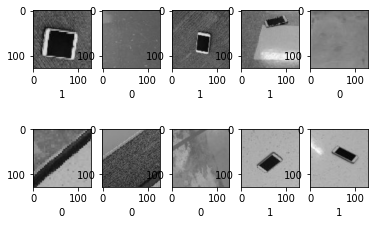

In [16]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X[i])
  plt.xlabel(Y[i])
  i += 1

### Split the data into train and test

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Print shape of the X train and X test data

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 128, 128, 3)
(74, 128, 128, 3)
(171,)
(74,)


### Normalize the data by dividing by 255

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

###  One hot encode the labels for train and test data 
Hint:- We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [20]:
Y_train= tf.keras.utils.to_categorical(y_train,num_classes=2)
Y_test = tf.keras.utils.to_categorical(y_test,num_classes=2)

## 5. Model building

### Define the model architecture using TensorFlow with a Conv2D layer followed by dense layers with activation as ReLu and softmax respectively. 

In [21]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(rate=0.15))

model.add(Flatten())

model.add(Dense(100,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               5

### Compile the above model using appropriate loss metric. Try with sgd, adam optimizer and "accuracy" as metrics. 

### **Compiling the model using adam optimizer**

In [23]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

### Fit the model on the training dataset along with it's equivalent one hot encoded labels

In [24]:
history = model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=20,batch_size=32)

Epoch 1/20
6/6 [==============================] - 33s 135ms/step - loss: 0.8511 - accuracy: 0.5971 - val_loss: 1.0689 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 0s 25ms/step - loss: 0.4238 - accuracy: 0.8493 - val_loss: 1.3350 - val_accuracy: 0.5000
Epoch 3/20
6/6 [==============================] - 0s 26ms/step - loss: 0.3458 - accuracy: 0.8853 - val_loss: 4.8519 - val_accuracy: 0.5000
Epoch 4/20
6/6 [==============================] - 0s 24ms/step - loss: 0.3125 - accuracy: 0.8982 - val_loss: 0.5756 - val_accuracy: 0.8243
Epoch 5/20
6/6 [==============================] - 0s 26ms/step - loss: 0.2302 - accuracy: 0.9358 - val_loss: 0.4189 - val_accuracy: 0.8243
Epoch 6/20
6/6 [==============================] - 0s 24ms/step - loss: 0.2181 - accuracy: 0.9604 - val_loss: 0.3319 - val_accuracy: 0.8514
Epoch 7/20
6/6 [==============================] - 0s 25ms/step - loss: 0.1415 - accuracy: 0.9578 - val_loss: 0.3780 - val_accuracy: 0.8784
Epoch 8/20
6/6 [=========

## 6. Evaluate the model


### Evaluate the model on test data and print loss and accuracy

In [25]:
matrices = model.evaluate(X_test, Y_test)
print('-' *100)
print('Loss :',matrices[0])
print('Accuracy :',matrices[1])

3/3 [==============================] - 0s 6ms/step - loss: 0.4133 - accuracy: 0.8649
----------------------------------------------------------------------------------------------------
Loss : 0.41327378153800964
Accuracy : 0.8648648858070374


### Predict label data of the test data and check confusion matrix

In [26]:
y_pred = np.argmax(model.predict(X_test),axis=1)

In [27]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1])

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print('-'*100)
print(classification_report(y_test, y_pred))

[[29  8]
 [ 2 35]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.78      0.85        37
           1       0.81      0.95      0.88        37

    accuracy                           0.86        74
   macro avg       0.87      0.86      0.86        74
weighted avg       0.87      0.86      0.86        74



### Display test images and their predicted label for a few samples

actual is 0 and predited label is 1


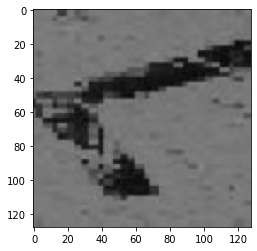

actual is 0 and predited label is 1


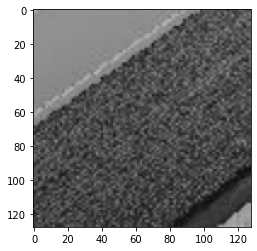

actual is 1 and predited label is 1


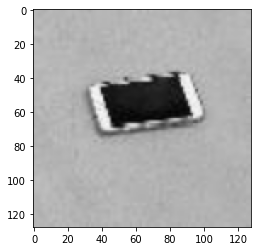

actual is 1 and predited label is 1


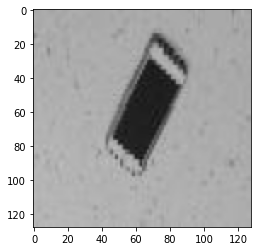

actual is 0 and predited label is 0


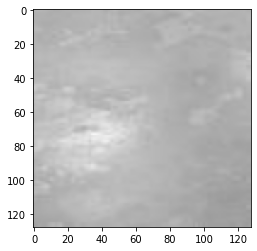

In [29]:
  for i in range(5):
    label = y_pred[i]
    actual = y_test[i]
    img = X_test[i]
    print('actual is {} and predited label is {}' .format(actual,label) )
    plt.imshow(img);
    plt.show()


atual is 0 and predited label is 1


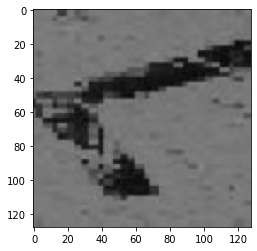

atual is 0 and predited label is 1


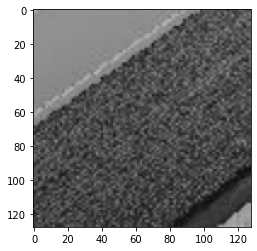

atual is 0 and predited label is 1


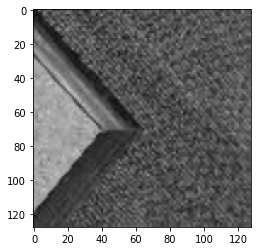

atual is 1 and predited label is 0


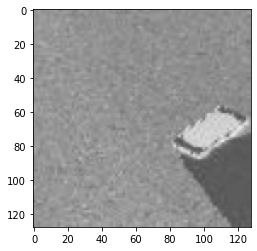

atual is 0 and predited label is 1


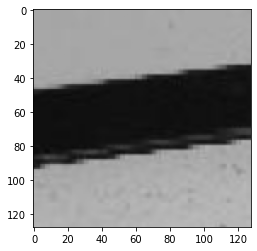

atual is 0 and predited label is 1


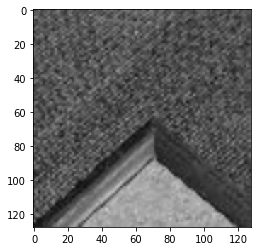

atual is 1 and predited label is 0


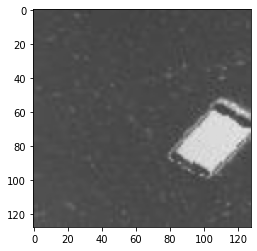

atual is 0 and predited label is 1


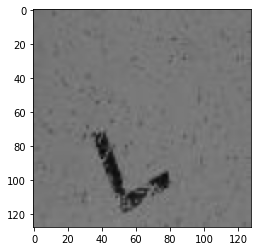

atual is 0 and predited label is 1


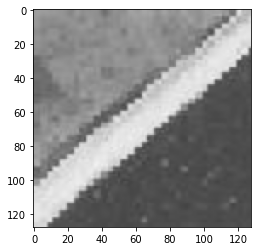

atual is 0 and predited label is 1


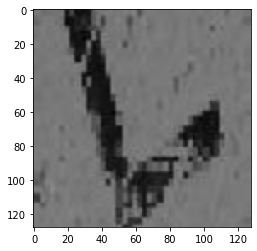

In [30]:
for i in range(X_test.shape[0]):
  label = y_pred[i]
  actual = y_test[i]
  if label != actual:
    img = X_test[i]
    print('atual is {} and predited label is {}' .format(actual,label) )
    plt.imshow(img);
    plt.show()


### Print following plots
1. Plot training accuracy vs validation accuracy
2. Plot training loss vs validation loss

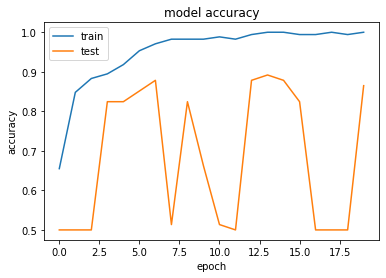

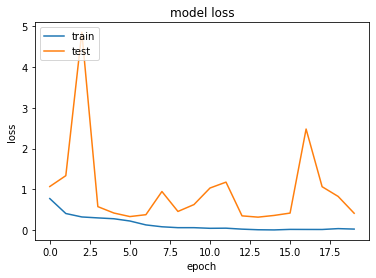

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

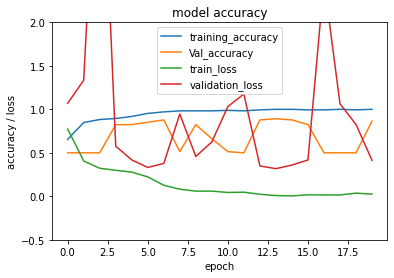

In [32]:
fig, axs = plt.subplots()
axs.set_ylim([-0.5,2])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'Val_accuracy', 'train_loss','validation_loss'], loc='best')
plt.show()

### **Compiling the model using SGD optimizer**

In [33]:
model1 = Sequential()
model1.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(128,128,3)))
model1.add(MaxPooling2D(2, 2))
model1.add(Conv2D(64,kernel_size=3,activation='relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(rate=0.15))

model1.add(Flatten())

model1.add(Dense(100,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(2,activation='softmax'))

model1.compile(loss='categorical_crossentropy',optimizer="sgd",metrics=["accuracy"])

history_sgd = model1.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=20,batch_size=32)

Epoch 1/20
6/6 [==============================] - 1s 57ms/step - loss: 0.7773 - accuracy: 0.6478 - val_loss: 0.8192 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 0s 28ms/step - loss: 0.5390 - accuracy: 0.8057 - val_loss: 0.8100 - val_accuracy: 0.5000
Epoch 3/20
6/6 [==============================] - 0s 26ms/step - loss: 0.4404 - accuracy: 0.8772 - val_loss: 0.6271 - val_accuracy: 0.5811
Epoch 4/20
6/6 [==============================] - 0s 24ms/step - loss: 0.4463 - accuracy: 0.8192 - val_loss: 0.6575 - val_accuracy: 0.5270
Epoch 5/20
6/6 [==============================] - 0s 24ms/step - loss: 0.4002 - accuracy: 0.8365 - val_loss: 0.5961 - val_accuracy: 0.7973
Epoch 6/20
6/6 [==============================] - 0s 24ms/step - loss: 0.3607 - accuracy: 0.9015 - val_loss: 0.5943 - val_accuracy: 0.7838
Epoch 7/20
6/6 [==============================] - 0s 24ms/step - loss: 0.3331 - accuracy: 0.8350 - val_loss: 0.6648 - val_accuracy: 0.5135
Epoch 8/20
6/6 [===========

In [34]:
matrices1 = model1.evaluate(X_test, Y_test)
print('-' *100)
print('Loss :',matrices1[0])
print('Accuracy :',matrices1[1])

3/3 [==============================] - 0s 6ms/step - loss: 0.5955 - accuracy: 0.5135
----------------------------------------------------------------------------------------------------
Loss : 0.5954718589782715
Accuracy : 0.5135135054588318


In [35]:
y_pred1 = np.argmax(model1.predict(X_test),axis=1)
print(confusion_matrix(y_test, y_pred1))
print('-'*100)
print(classification_report(y_test, y_pred1))

[[ 1 36]
 [ 0 37]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        37
           1       0.51      1.00      0.67        37

    accuracy                           0.51        74
   macro avg       0.75      0.51      0.36        74
weighted avg       0.75      0.51      0.36        74



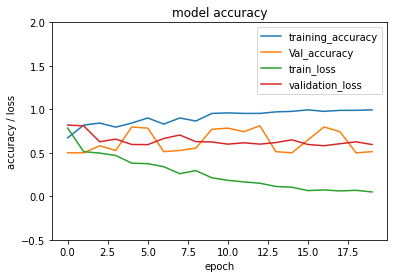

In [36]:
fig, axs = plt.subplots()
axs.set_ylim([-0.5,2])
plt.plot(history_sgd.history['accuracy'])
plt.plot(history_sgd.history['val_accuracy'])
plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'Val_accuracy', 'train_loss','validation_loss'], loc='best')
plt.show()

## 7.  Conclusion and Interpretation

### Write your observations and findings

Observations:
1. 'adam' optimizer is giving good accuracy as compare to 'sgd' optimizer.
2. as per observtion after some iterataions model starts overfitting. trying to fix this by using dropout layer.
3. as we Display test images and their predicted label for a few samples we observed some missclassified images. trying to fix this by changing few hyperparameter.


## 8. Further Explore

### Try changing a few hyperparameters such as number of layers in the network or number of units in a hidden layer or try different activation functions in the hidden layers and see if you get better results than the previous network

In [37]:
model2 = Sequential()
model2.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(128,128,3)))
model2.add(MaxPooling2D(2, 2))
model2.add(Dropout(rate=0.15))
model2.add(Conv2D(64,kernel_size=3,activation='relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Dropout(rate=0.25))

model2.add(Flatten())

model2.add(Dense(200,activation='relu'))
model2.add(Dense(100,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(2,activation='softmax'))

model2.compile(loss='categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

Explore = model2.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=20,batch_size=32)

Epoch 1/20
6/6 [==============================] - 1s 105ms/step - loss: 0.8029 - accuracy: 0.5862 - val_loss: 0.5514 - val_accuracy: 0.7297
Epoch 2/20
6/6 [==============================] - 0s 32ms/step - loss: 0.5919 - accuracy: 0.6934 - val_loss: 0.9354 - val_accuracy: 0.5270
Epoch 3/20
6/6 [==============================] - 0s 32ms/step - loss: 0.5041 - accuracy: 0.8236 - val_loss: 1.0247 - val_accuracy: 0.5270
Epoch 4/20
6/6 [==============================] - 0s 32ms/step - loss: 0.4330 - accuracy: 0.8855 - val_loss: 0.6334 - val_accuracy: 0.7027
Epoch 5/20
6/6 [==============================] - 0s 31ms/step - loss: 0.3782 - accuracy: 0.8490 - val_loss: 2.2223 - val_accuracy: 0.5000
Epoch 6/20
6/6 [==============================] - 0s 30ms/step - loss: 0.4330 - accuracy: 0.8232 - val_loss: 7.6799 - val_accuracy: 0.5000
Epoch 7/20
6/6 [==============================] - 0s 31ms/step - loss: 0.4550 - accuracy: 0.8181 - val_loss: 5.8797 - val_accuracy: 0.5000
Epoch 8/20
6/6 [==========

1. Tried to use different activations function like sigmoid, tanh and softplus but no improvement observed in the accuracy as compare to previous accuracy.
2. after adding one more dense layer, dropout layer and  changed number of units in the hidden layer some improvement observed.
